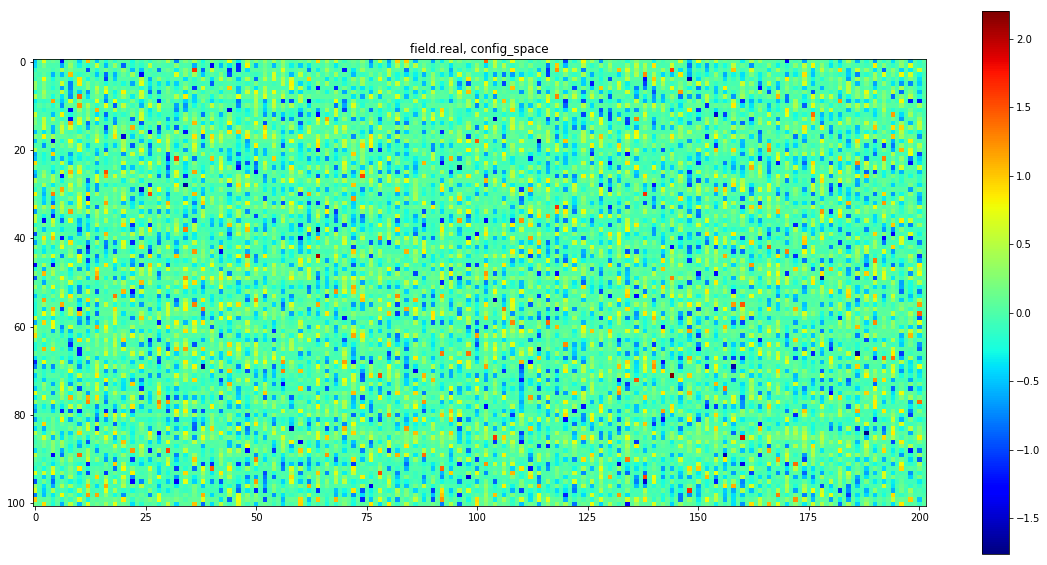

In [90]:
import numpy as np
import matplotlib.pyplot as pl

def model0(k):
    return k**0*0.5

def gen_2Dgauss(N, Lx, Ly, model):

    field = np.zeros((N,N*2), dtype = complex)

    dkx = (2.*np.pi)/Lx
    dky = (2.*np.pi)/Ly

    for ix in range(0, N):
        if ix <= N/2:
            kx = ix*dkx
        else:
            kx = (ix-N)*dkx
    
        for iy in range(0, N):
            if iy <= N/2:
                ky = iy*dky
            else:
                ky = (iy-N)*dky
        
            kval = (kx**2 + ky**2)**0.5
        
            field[ix, iy] = np.random.normal(0.,(model(kval)/2.)**0.5) + np.random.normal(0.,(model(kval)/2.)**0.5)*1j

    # Now we have to set \delta(-k) = \delta^*(k)
    # Note that \delta_n = \delta_{n+N} and therefore we have to set \delta(2dk,-dk) = \delta^*(2dk,dk)
    for ix in range(int(N/2)+1, N):
    
        jx = N-ix
    
        field[ix, 0] = field[jx, 0].real - field[jx, 0].imag*1j
        field[0, ix] = field[0, jx].real - field[0, jx].imag*1j

        for iy in range(1, N):
        
            jy = N-iy
        
            field[ix, iy] = field[jx, jy].real - field[jx, jy].imag*1j

    if N % 2 == 0:
        for ix in range(1, N/2):
            jx = N-ix
            
            field[N/2,ix] = field[N/2,jx].real - field[N/2,jx].imag*1j


        kval = dkx*N/2
        # Set the complex part to zero if there is no partner (note the factor of 2 difference)
        field[0,N/2] = np.random.normal(0.,model(kval)**0.5) + 0.*1j;
        field[N/2,0] = np.random.normal(0.,model(kval)**0.5) + 0.*1j;
        
        kval = (dkx*N/2)*(2**0.5)
        
        field[N/2,N/2] = np.random.normal(0.,model(kval)**0.5) + 0.*1j;

    field[0,0] = 0. + 0.*1j
    
    return field

def main():
    
    Lx = 20.
    Ly = 20.
    V = Lx*Ly
    N = 101
    dk = (2.*np.pi)/Lx
    
    #-----------------------------------------#
    #-- Generate Gaussian random field -------#
    #-----------------------------------------#
    
    kspace_field = gen_2Dgauss(N, Lx, Ly, model0)
    
    config_field = np.fft.ifft2(kspace_field)*kspace_field.size**0.5
    
    fig, ax = pl.subplots(figsize=(20,10))
    im = ax.imshow(config_field.real, cmap=pl.cm.jet)
    fig.colorbar(im, ax=ax)
    pl.title("field.real, config_space")
    pl.show()
    
    
#     fig, ax = pl.subplots()
#     im = ax.imshow(config_field.imag, cmap=pl.cm.jet)
#     fig.colorbar(im, ax=ax)
#     pl.title("field.imag, config_space")
#     pl.show()
    return config_field
a = main().real

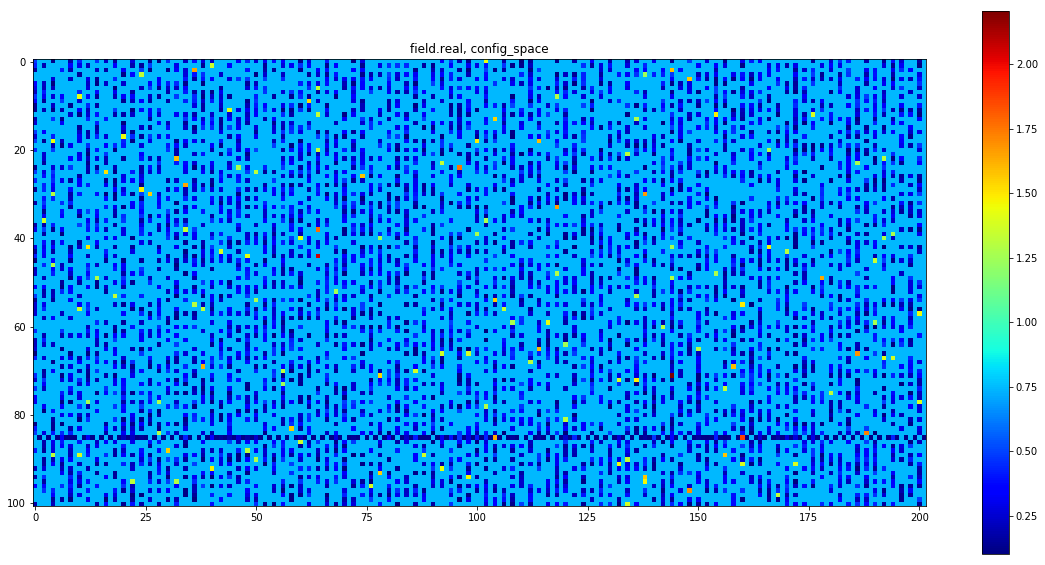

In [91]:
fig, ax = pl.subplots(figsize=(20,10))
b = np.abs(a)
# b[b>2] = 2
b[(b>0.5)&(b<1.25)] = 0.75
b[(b>0.0)&(b<.1)] = 0.75
im = ax.imshow(b, cmap=pl.cm.jet)
fig.colorbar(im, ax=ax)
pl.title("field.real, config_space")
pl.show()